In [25]:
NAME = "Niloy Farhan"
ID = "20101118"
COLLABORATORS_ID = ["21241056", "18101089"]

# **CSE428 Week 9 Coding Assignment**

In this assignment we would like to implement a simple version of the following Block Transform Coding for the JPEG compression standard. Finally, we would calculate the $SNR$ for different scenarios.

We would assume that the symbol encoding and decoding are lossless (reasonable assumption) and hence we would not implement the "Symbol encoder" and "Symbol decoder" blocks.

In [26]:
%%html
<center>
<iframe src="https://drive.google.com/file/d/1U0xD_HJLU4zW7hjG-W_iLFeCaioaoDlZ/preview" width="60%" height="60%"></iframe></center>

For a overview of the JPEG compression algorithm, the following Computerphile videos might be helpful for better understanding:


> https://youtu.be/LFXN9PiOGtY <br>
> https://youtu.be/n_uNPbdenRs <br>
> https://youtu.be/Q2aEzeMDHMA





In [27]:
# imports
from scipy.fftpack import fft, dct, dctn, idct, idctn
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

In [28]:
# Helper function for plotting images

def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

## Step 1: Import the image

In [29]:
from skimage import io
image = io.imread("/content/image5.jpg") #import your own COLOR image

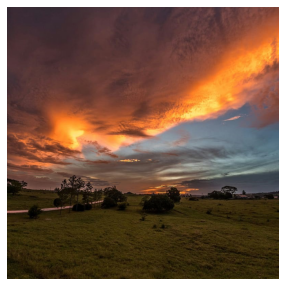

Image shape:  (800, 800, 3)


In [30]:
plot_image(image)


## Step 2: Convert the RGB image to YCbCr color space

In [31]:
from skimage.color import rgb2ycbcr

In [32]:
image_ycbcr = rgb2ycbcr(image)

In [33]:
Y, Cb, Cr = image_ycbcr[:,:,0], image_ycbcr[:,:,1], image_ycbcr[:,:,2]

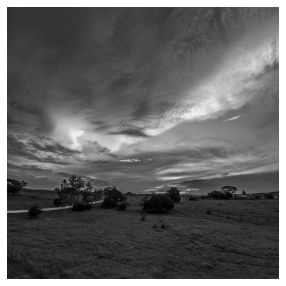

Image shape:  (800, 800)


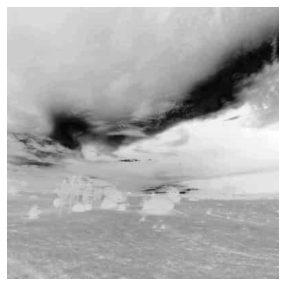

Image shape:  (800, 800)


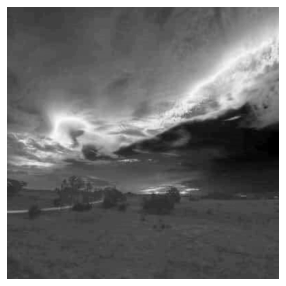

Image shape:  (800, 800)


In [34]:
plot_image(Y)
plot_image(Cb)
plot_image(Cr)

## Step 3: Block Transform Encoder (DCT Based Compression)

## Step 3.1 Write a sub routine for calculating DCT & Normalization of 8x8 subimages

In [35]:
# Define Z

Z = np.array([[ 16, 11, 10, 16, 24, 40, 51, 61],
              [ 12, 12, 14, 19, 26, 58, 60, 55],
              [ 14, 13, 16, 24, 40, 57, 69, 56],              
              [ 14, 17, 22, 29, 51, 87, 80, 62],
              [ 18, 22, 37, 56, 68,109,103, 77],
              [ 24, 35, 55, 64, 81,104,113, 92],
              [ 49, 64, 78, 87,103,121,120,101],
              [ 72, 92, 95, 98,112,100,130, 99]])

In [36]:
def subimageDCT(F):
    for i in range(3):
      F[:,:,i] -= 128
    height = F.shape[0] 
    width = F.shape[1]  
    subImg = F.copy()
    for h in range(0,height,8):
      for w in range(0,width,8):
        for i in range(3):
          color_image_single_channel = F[h:h+8,w:w+8,i]
          subImg[h:h+8,w:w+8,i] = dctn(color_image_single_channel, norm="ortho")
    return subImg # TO-DO
  
T = subimageDCT(image_ycbcr)


In [37]:
def subimageNormalization(T, Z, multiplier = 1):
    height = T.shape[0] 
    width = T.shape[1]  
    subImg = T.copy()
    for h in range(0,height,8):
      for w in range(0,width,8):
        for i in range(3):
          color_image_single_channel = T[h:h+8,w:w+8,i]
          subImg[h:h+8,w:w+8,i] = np.round_((np.divide(color_image_single_channel,Z*multiplier)))
    return subImg # TO-DO

T_hat = subimageNormalization(T, Z)

## 3.2 Loop over the Y Cb Cr for 8x8 blocks and perform DCT + Normalization

In [38]:
Y_compressed = np.zeros_like(Y)
Y_compressed = T_hat[:,:,0]
# TO-DO                 I actually made a 3 channel subimage Normalization function before watching this cell :3

Cb_compressed = np.zeros_like(Cb)
Cb_compressed = T_hat[:,:,1]
# TO-DO

Cr_compressed = np.zeros_like(Cr)
Cr_compressed = T_hat[:,:,2]
# TO-DO

## Step 4: Block Transform Decoder (DCT Based Decompression)

## Step 4.1 Write a sub routine for calculating IDCT & Denormalization of 8x8 subimages

In [39]:
def subimageDeNormalization(T, Z, multiplier=1):
    height = T.shape[0] 
    width = T.shape[1]  
    subImg = T.copy()
    for h in range(0,height,8):
      for w in range(0,width,8):
        for i in range(3):
          color_image_single_channel = T[h:h+8,w:w+8,i]
          subImg[h:h+8,w:w+8,i] = np.multiply(color_image_single_channel,Z*multiplier)
    return subImg

T_again = subimageDeNormalization(T_hat, Z)

In [40]:
def subimageIDCT(T):
    height = T.shape[0] 
    width = T.shape[1]  
    subImg = T.copy()
    for h in range(0,height,8):
      for w in range(0,width,8):
        for i in range(3):
          DCT_coeff_single_channel = T[h:h+8,w:w+8,i]
          subImg[h:h+8,w:w+8,i] = idctn(DCT_coeff_single_channel, norm="ortho")
    for i in range(3):
      subImg[:,:,i] += 128
    return subImg 
Decompressed_image =  subimageIDCT(T_again)

## 4.2 Loop over the compressed Y Cb Cr for 8x8 blocks and perform IDCT + Denormalization

In [41]:
Y_decompressed = np.zeros_like(Y)
Y_decompressed = Decompressed_image[:,:,0]
# TO-DO                                 #Same reason :3
Cb_decompressed = np.zeros_like(Cb)
Cb_decompressed = Decompressed_image[:,:,1]
# TO-DO

Cr_decompressed = np.zeros_like(Cr)
Cr_decompressed = Decompressed_image[:,:,2]
# TO-DO

# Step 5: Convert the decompressed YCbCr image to RGB color space

## Step 5.1 Stack the decompressed Y, Cb, Cr components to create a 3D volume

In [42]:
image_ycbcr_decompressed = np.concatenate((np.expand_dims(Y_decompressed, axis=-1),
                                           np.expand_dims(Cb_decompressed, axis=-1),
                                           np.expand_dims(Cr_decompressed, axis=-1)), axis=-1)

## Step 5.2 Convert the decompressed YCbCr image to RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


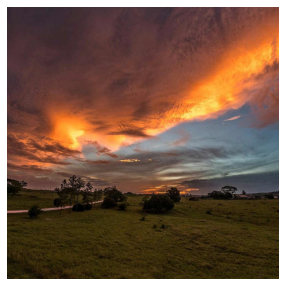

Image shape:  (800, 800, 3)


In [43]:
from skimage.color import ycbcr2rgb
image_decompressed = ycbcr2rgb(image_ycbcr_decompressed)
plot_image(image_decompressed)

# Step 6: Calculate $SNR_{ms}$ for $Z, 2Z\,\&\, 5Z$



In [44]:
#TO-DO


def SNR(O,C):
  SNR = 0
  d = np.multiply(np.subtract(C,O),np.subtract(C,O))
  d =np.sum(d)
  SNR = np.sum(C)/d
  return SNR

def fullcompression_decompression(O,Z,multiplier = 1):
  O_ycbcr = rgb2ycbcr(O)
  T = subimageDCT(O_ycbcr)
  T_hat = subimageNormalization(T, Z, multiplier)
  T_again = subimageDeNormalization(T_hat, Z, multiplier)
  D =  subimageIDCT(T_again)
  D = ycbcr2rgb(D)
  return D

Z_SNR = SNR(image,image_decompressed)
Z2 = fullcompression_decompression(image,Z,2)
Z2_SNR = SNR(image,Z2)
Z5 = fullcompression_decompression(image,Z,5)
Z5_SNR = SNR(image,Z5)

print("SNR for Z = ",Z_SNR)
print("SNR for 2Z = ",Z2_SNR)
print("SNR for 5Z = ",Z5_SNR)


SNR for Z =  3.5965785558072935e-05
SNR for 2Z =  3.5961154365330655e-05
SNR for 5Z =  3.6019238145434154e-05


# Step 7: Plot the decompressed images of the original image, along with the original uncompressed image in a 1x4 subplot for $Z, 2Z\,\&\, 5Z$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 799.5, 799.5, -0.5)

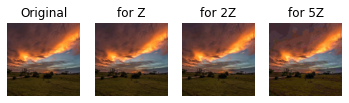

In [45]:
import matplotlib.pyplot as plt
plt.subplot(1,4,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")
plt.subplot(1,4,2)
plt.imshow(image_decompressed)
plt.title("for Z")
plt.axis("off")
plt.subplot(1,4,3)
plt.imshow(Z2)
plt.title("for 2Z")
plt.axis("off")
plt.subplot(1,4,4)
plt.title("for 5Z")
plt.imshow(Z5)
plt.axis("off")

# Step 8: Additional experimentation. Feel free to play with the code that you just developed and report your findings. For example, you may try a different quantization matrix $Z$ or use different $Z$s for different channels, etc. This is a bonus task.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


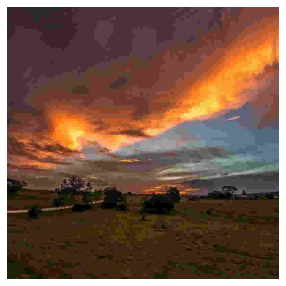

Image shape:  (800, 800, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


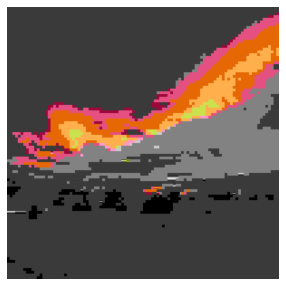

Image shape:  (800, 800, 3)


In [46]:
#TO-DO
UltaZ = np.array([[99, 130, 100, 112, 98, 95, 92, 72],
                  [101, 120, 121, 103, 87, 78, 64, 49],
                  [92, 113, 104, 81, 64, 55, 35, 24],
                  [77, 103, 109, 68, 56, 37, 22, 18],
                  [62, 80, 87, 51, 29, 22, 17, 14],
                  [56, 69, 57, 40, 24, 16, 13, 14],
                  [55, 60, 58, 26, 19, 14, 12, 12],
                  [61, 51, 40, 24, 16, 10, 11, 16]])
# REVERSE MATRIX OF GIVEN Z
Z_ulta = fullcompression_decompression(image,UltaZ,1)
plot_image(Z_ulta)

Z_ulta = fullcompression_decompression(image,UltaZ,5)
plot_image(Z_ulta)